<a href="https://colab.research.google.com/github/lucasfranca016/BootcampDataScience/blob/main/Modulo1/Projeto1_Bootcamp_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O escolpo do meu projeto será analisar os dados referentes aos óbitos, gastos, internações e médias de permanência por unidade de federação  Ano/Mês processamento a fim de gerar hipóteses de correlação e assimilar padrões em comum, principalmente na faixa temporal referente ao início da crise do vírus COVID-19.

In [ ]:
#Importando todos os dados:

import pandas as pd

pd.options.display.float_format='{:.2f}'.format

gastos = pd.read_csv('A165814189_28_143_208.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

obitos = pd.read_csv('A050051189_28_143_208.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

internacoes = pd.read_csv('A052150189_28_143_208.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

media_permanencia = pd.read_csv('A053750189_28_143_208.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
                thousands='.', decimal=',')

<ipython-input-1-a82e6c056e85>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gastos = pd.read_csv('A165814189_28_143_208.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
<ipython-input-1-a82e6c056e85>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  obitos = pd.read_csv('A050051189_28_143_208.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
<ipython-input-1-a82e6c056e85>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  internacoes = pd.read_csv('A052150189_28_143_208.csv', encoding='ISO-8859-1', skiprows = 3, sep = ';', skipfooter=12,
<ipython-input-1-a82e6c056e85>:16: ParserWarning: Falling back 

In [ ]:
gastos.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [ ]:
obitos.head()

,Região/Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,1008,1329,1406,1278,1243,1299,1572,1455,1512,...,3834,3625,2941,2583,2382,2469,3386,3829,4381,319412
1,.. Rondônia,57,99,45,43,54,47,109,114,105,...,446,476,408,293,266,360,435,333,559,37058
2,.. Acre,30,94,76,103,94,71,114,116,104,...,192,163,136,173,119,147,143,188,205,18615
3,.. Amazonas,149,243,312,320,240,270,288,284,254,...,916,657,673,609,715,607,1330,1616,1796,64963
4,.. Roraima,23,21,23,38,26,24,38,29,34,...,177,85,107,114,135,127,190,322,287,12466


In [ ]:
internacoes.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,...,8353,8473,8907,8165,9058,8130,8065,6463,6431,1387140
1,12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,...,3479,3774,3454,4225,3612,3698,3915,3483,3969,637069
2,13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,...,15054,14244,15290,15429,15085,13885,14517,17265,15855,2248754
3,14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,...,2899,3263,3063,3481,3435,3496,3157,3304,3278,465989
4,15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,...,33340,38719,36072,37057,38147,36941,36537,34126,27721,6479075


In [ ]:
media_permanencia.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,3.00,3.60,2.80,3.00,3.20,3.10,3.90,4.20,4.10,...,5.00,4.80,4.40,4.20,4.70,4.40,5.20,5.00,5.50,4.40
1,12 Acre,3.50,4.50,4.40,4.40,4.70,4.10,4.40,4.50,4.70,...,5.10,4.60,4.50,4.70,4.40,4.70,4.60,5.50,5.40,4.70
2,13 Amazonas,4.60,4.70,4.60,4.60,4.90,4.90,4.80,4.90,4.90,...,5.30,5.40,5.50,5.10,5.60,5.10,5.40,5.50,5.80,5.10
3,14 Roraima,4.50,4.60,4.70,5.60,4.50,4.80,4.40,4.60,5.20,...,5.80,5.80,5.70,5.70,6.00,5.70,5.80,6.70,6.40,5.20
4,15 Pará,3.40,3.60,3.80,3.60,3.80,3.70,3.80,3.90,3.90,...,4.30,4.40,4.30,4.10,4.10,4.10,4.20,4.20,4.60,3.90


Segundo o site do governo os dados referentes aos últimos seis meses estão sujeitos a atualização, então iremos usar essa informação para basear nossos recortes. A intenção é pegar os últimos anos, eliminando alguns dos últimos meses, que não terão o dados atualizados e corretos.

Iremos retirar as colunas "Total" de todos os dataframes, iremos definir as colunas de unidade da federação como index e vamos fazer os tratamentos necessários para que possamos plotar os gráficos.

Nossa análise será focada nos estados do Sudeste, região onde o interlocutor quem vos comunica reside.


In [ ]:
colunas_usaveis = []
colunas_usaveis.append(gastos.mean().index.tolist())
colunas_usaveis.append(internacoes.mean().index.tolist())
colunas_usaveis.append(media_permanencia.mean().index.tolist())
colunas_usaveis.append(obitos.mean().index.tolist())

In [ ]:
for i in range(0,3):
    colunas_usaveis[i].insert(0,'Unidade da Federação')
    
colunas_usaveis[3].insert(0,'Região/Unidade da Federação')

In [ ]:
gastos2 = gastos[colunas_usaveis[0]]
internacoes2 = internacoes[colunas_usaveis[1]]
media_permanencia2 = media_permanencia[colunas_usaveis[2]]
obitos2 = obitos[colunas_usaveis[3]]

Fizemos um recorte nos utilizando do fato de que a função mean seleciona as colunas que não possuem valores vazios.

In [ ]:
gastos2.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região Geográfica
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07,Nordeste
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80,Sul
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48,Sul


In [ ]:
internacoes2.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região Geográfica
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,125361,155799,169738,178746,200439,193555,202386,194738,197277,194543,...,181563,179353,185941,190986,190114,183014,190050,184880,185488,Sudeste
31 Minas Gerais,67509,89738,96161,93949,96064,106686,98481,98257,97953,99139,...,89609,90306,92662,95140,94602,91661,90748,90551,93083,Sudeste
29 Bahia,41659,51637,59728,74525,79931,85057,79247,78254,76724,74851,...,54247,54967,56366,61241,60955,59114,55463,54972,58199,Nordeste
41 Paraná,51180,61926,63178,60734,60660,63040,62952,61885,62168,63107,...,55264,58442,59155,63596,62995,56858,58777,63223,59861,Sul
43 Rio Grande do Sul,41729,64477,61229,64063,56673,58261,64280,63316,61107,61707,...,53202,52509,52539,59214,57284,55811,56731,54143,54463,Sul


In [ ]:
media_permanencia2.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Região Geográfica
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
33 Rio de Janeiro,8.60,10.20,9.60,9.80,9.50,9.80,9.80,9.70,9.70,9.40,...,7.30,7.20,7.00,7.00,7.20,7.20,7.00,6.80,6.70,Sudeste
53 Distrito Federal,6.40,6.70,6.00,6.40,6.40,6.30,6.10,6.20,6.60,6.00,...,5.40,5.40,5.20,5.50,5.50,5.70,5.30,5.60,6.00,Sudeste
35 São Paulo,6.90,7.30,7.10,6.90,7.00,7.10,7.00,7.00,6.90,6.80,...,6.10,6.00,5.80,5.70,5.70,5.80,5.90,5.80,6.20,Nordeste
43 Rio Grande do Sul,5.50,6.00,5.70,5.80,5.70,6.00,5.80,5.90,5.90,5.80,...,6.20,6.20,6.20,6.20,6.20,6.20,6.10,6.20,6.80,Sul
26 Pernambuco,6.70,6.20,7.00,6.70,6.60,6.80,6.80,6.70,6.60,6.80,...,5.50,5.60,5.60,5.40,5.70,5.60,5.80,5.50,5.60,Sul


In [ ]:
obitos2.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Região Sudeste,8377,11992,14161,13962,15956,16767,17526,17072,16574,16411,...,24876,27676,25809,25019,24525,23135,23457,26453,24826,31629
.. São Paulo,4762,6849,7525,7818,9152,9104,10110,9580,9161,9198,...,13347,14902,13495,12911,12823,11517,11704,13471,13087,16850
Região Nordeste,3331,4987,5488,6470,5961,6501,6948,6554,6585,6416,...,13589,14104,13293,11523,11393,11301,10738,11997,11996,14057
Região Sul,3557,5951,5603,5536,5258,5958,6327,6260,5905,5956,...,7650,8933,9873,9219,9463,8939,9142,10210,10169,14106
.. Minas Gerais,2251,3396,3729,3437,3638,4388,4240,4196,4025,3972,...,4744,5517,5964,5907,6113,5460,5340,6083,5811,7331


Usamos a função mean para fazer um recorte somente das colunas que possuem valores.

In [ ]:
internacoes2 = internacoes2.set_index("Unidade da Federação")
media_permanencia2 = media_permanencia2.set_index("Unidade da Federação")
gastos2 = gastos2.set_index("Unidade da Federação")
obitos2 = obitos2.set_index("Região/Unidade da Federação")

In [ ]:
internacoes2 = internacoes2.sort_values('Total', ascending=False)
media_permanencia2 = media_permanencia2.sort_values('Total', ascending=False)
gastos2 = gastos2.sort_values('Total', ascending=False)
obitos2 = obitos2.sort_values('Total', ascending=False)


Ordenamos as linhas pela coluna "Total" de forma Decrescente.

In [ ]:
internacoes2 = internacoes2.drop('Total',axis=1)
media_permanencia2 = media_permanencia2.drop('Total',axis=1)
gastos2 = gastos2.drop('Total',axis=1)
obitos2 = obitos2.drop('Total',axis=1)

In [ ]:
def reg(x):

    indexes = x.index

    região = []

    for i in indexes:

        if i[0] == '1':

            região.append('Norte')

        if i[0] == '2':

            região.append('Nordeste')

        if i[0] == '3':

            região.append('Sudeste')

        if i[0] == '4':

            região.append('Sul')

        if i[0] == '5':

            região.append('Centro-Oeste')
            
    return região

gastos2['Região Geográfica'] = reg(gastos2)
media_permanencia2['Região Geográfica'] = reg(media_permanencia2)
internacoes2['Região Geográfica'] = reg(internacoes2)

Aqui fiz uma função para ler o primeiro digito do id, que é referente a qual região geográfica o estado se encontra, e então criei uma coluna que mostrava em qual região geográfica se encontra esse estado.

In [ ]:
gastos_sudeste = gastos2[gastos2['Região Geográfica'] == 'Sudeste']
permanencia_sudeste = media_permanencia2[media_permanencia2['Região Geográfica'] == 'Sudeste']
internacao_sudeste = internacoes2[internacoes2['Região Geográfica'] == 'Sudeste']
obitos_sudeste = obitos2[obitos2.index == 'Região Sudeste']

Aqui eu fiz um recorte apenas dos estados do sudeste utilizando as colunas que eu criei, com exceção do dataframe de óbitos que já era separado por regiões geográficas e não por estados. 

Abaixo eu ploto os gráficos usando a biblioteca matplotlib, fazendo um recorte para ir de Janeiro de 2015 até sétimo último mês que possui dados do dataframe. Para melhorar a aparência do gráfico mudo o tipo de formatação númerica em que ele apresenta os números, mudo a localização da legenda e nomeio cada eixo, além de dar título e definir o eixo y para começar do 0 em alguns casos.

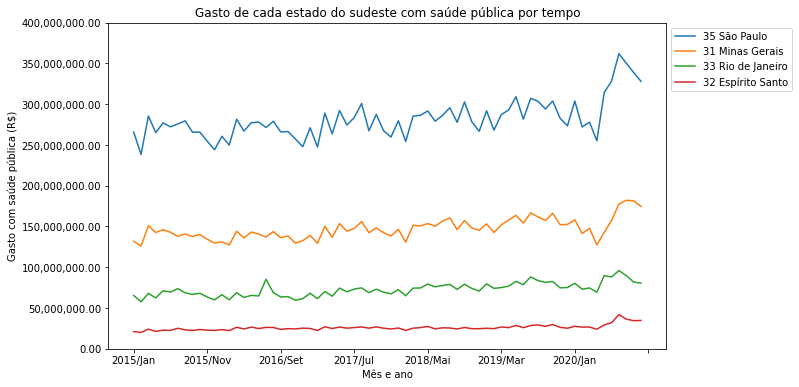

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

ax = gastos_sudeste.T[89:-6].plot(figsize=(10,6))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Mês e ano')

plt.ylabel('Gasto com saúde pública (R$)')

plt.title('Gasto de cada estado do sudeste com saúde pública por tempo')

plt.ylim(0, 400000000)

plt.show()

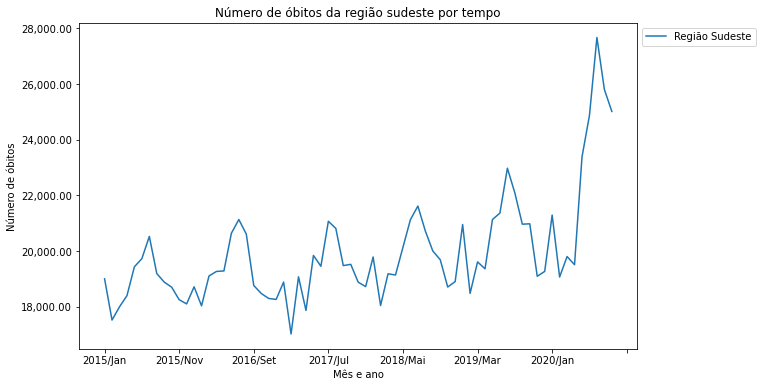

In [ ]:
ax2 = obitos_sudeste.T[83:-6].plot(figsize=(10,6))

ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Mês e ano')

plt.ylabel('Número de óbitos')

plt.title('Número de óbitos da região sudeste por tempo')

plt.show()

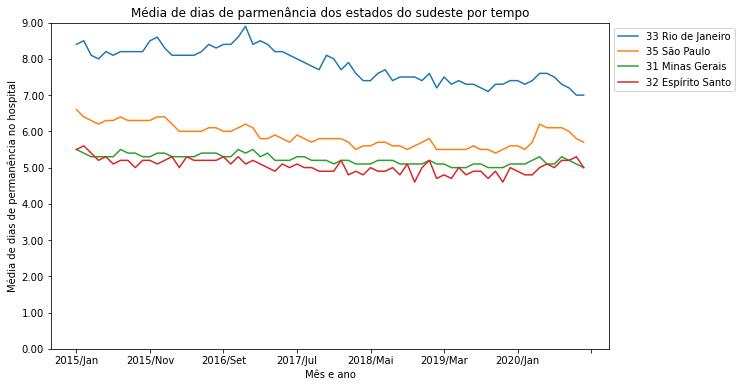

In [ ]:
ax3 = permanencia_sudeste.T[84:-6].plot(figsize=(10,6))

ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Mês e ano')

plt.ylabel('Média de dias de permanência no hospital')

plt.title('Média de dias de parmenância dos estados do sudeste por tempo')

plt.ylim(0, 9)

plt.show()

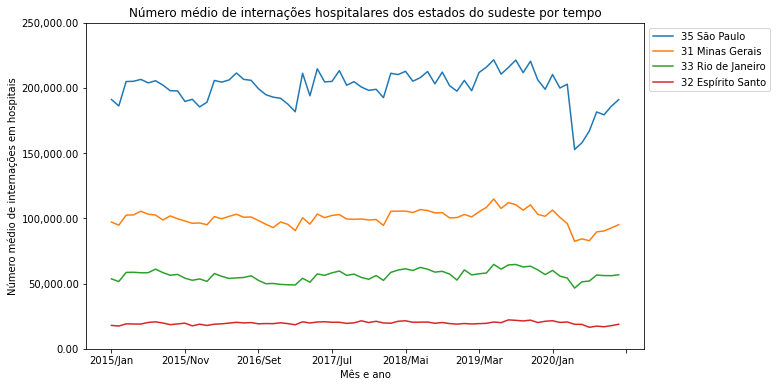

In [ ]:
ax4 = internacao_sudeste.T[83:-6].plot(figsize=(10,6))

ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.xlabel('Mês e ano')

plt.ylabel('Número médio de internações em hospitais')

plt.title('Número médio de internações hospitalares dos estados do sudeste por tempo')

plt.ylim(0, 250000)

plt.show()

Conclusões:

    .Observamos um padrão no gráfico de internações hospitalares, que é mais acentuado no estado de São Paulo, onde por volta do mês de Fevereiro o número de internações aumenta subitamente e vai caindo até esse feito ocorrer novamente. Vemos que esse efeito ocorre mais fortemente a partir do ano de 2019, assim como vemos mais picos no gráfico.
    
    .Analisando o gráfico de dias de permanência observamos um descréscimo na média de dias internados até aproximadente o meio do ano de 2019, onde observamos um comportamente crescente, que volta a descrescer no início de 2020.
    
    .Vemos através do gráfico de óbitos que temos um padrão que se repete anualmente, com 2 picos, um no final do ano e um no meio do ano, e que em média o número médio de óbitos vem crescendo lentamente, contudo, há um crescimento médio levemente maior no ano de 2019 e então há um crescimento abrupto no ano de 2020.
    
    .Analisando o gráfico de gastos público com saúde observamos que há um padrão anual parecido com o padrão de óbito, onde há um crescimento entre a primeira metade do ano e na segunda metade do ano há um descréscimo, permeado de diversos picos irregulares. É perceptível que a média de gastos dos 4 estados está lentamente aumentando, até que no início de 2020 há um pequeno decréscimo, seguindo o padrão mas caracterizado por ser mais acentuado, acompanhado de um enorme crescimento dos gastos.
    
Hipóteses:

    .Observamos padrões que são acentuados diante à pandemia que vivemos, por exemplo, há um pico no número de óbitos geralmente no meio ano, que é crescente mas que apresenta um pico muito maior no ano de 2020. Assim, mesmo com uma análise rasa, podemos supor que essas mudanças abruptas tem a ver com o impacto da pandemia sob os estados do sudeste.
    
    .Podemos supor que há correlação entre os picos dos gráficos de óbitos, gastos e número de internações, surgindo a hipótese de que por conta do grande número de casos de COVID-19 os hospitais sofreram com superlotação em um período que normamente já é difícil para a área da saúde, retratado pelos picos anteriores nos gráficos, assim, dificultando a internação de novos pacientes acarretando na morte de muitos deles que obviamente gera um comportamento do governo de investir dinheiro para reverter essa situação. É impressionante como os picos de morte e de investimento, junto com a maior queda da internção, parecem estar intimamente ligados.
    
Futuro:

    .Todas as hipóteses e conclusões foram retiradas de análises gráficas simplórias, assim, para melhor podermos inferir sobre a realidade que nos cerca precisamos utilizar técnicas de análise estatística para averiguar o quanto esses gráficos estão realmente correlacionados e o quão bem eles representam a realidade.
    
    .Uma ótima ideia para uma possível continuação seria utilizar machine learning para tentar prever, mesmo que com uma baixa precisão, o comportamento dessas variáveis com o passar do tempo para termos uma noção mínima de como será a situação da saúde do país em um futuro próximo.